In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sklearn
from sklearn import base
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PolynomialFeatures
from sklearn import metrics

In [3]:
np.random.seed(16082011)

 - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
 - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline
 - https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html#sklearn.pipeline.FeatureUnion
 - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression

In [4]:
def f(x):
    return 1 + x + x**2 + np.cos(x)

In [5]:
xl = np.linspace(-5, 5, 1001)
yl = f(xl)
e1 = np.random.randn(xl.size)
e2 = np.random.randn(xl.size)

In [6]:
df = pd.DataFrame({'x': xl, 'yth': yl, 'yexp': yl + np.abs(xl)*e1 + e2})
df.head()

,x,yth,yexp
0,-5.00,21.283662,24.331734
1,-4.99,21.184159,22.755368
2,-4.98,21.084828,18.460559
3,-4.97,20.985671,25.261467
4,-4.96,20.886689,20.382842


In [7]:
t1 = FunctionTransformer(func=np.cos)

In [8]:
p1 = FeatureUnion([
    ('Polynomial', PolynomialFeatures(degree=2)),
    ('Functional', t1)
])

In [9]:
p2 = Pipeline([
    ('Conditioner', p1),
    ('Standardizer', StandardScaler()),
    ('OLS', LinearRegression(fit_intercept=False))
])

In [10]:
model = TransformedTargetRegressor(
    regressor=p2,
    transformer=StandardScaler()
)

In [11]:
model.fit(df[['x']], df['yexp'])

TransformedTargetRegressor(regressor=Pipeline(steps=[('Conditioner',
                                                      FeatureUnion(transformer_list=[('Polynomial',
                                                                                      PolynomialFeatures()),
                                                                                     ('Functional',
                                                                                      FunctionTransformer(func=<ufunc 'cos'>))])),
                                                     ('Standardizer',
                                                      StandardScaler()),
                                                     ('OLS',
                                                      LinearRegression(fit_intercept=False))]),
                           transformer=StandardScaler())

In [12]:
df['yhat'] = model.predict(df[['x']])

In [13]:
model.score(df[['x']], df['yexp'])

0.8769556342122321

In [14]:
metrics.r2_score(df['yth'], df['yhat'])

0.9991477953542787

In [15]:
metrics.r2_score(df['yexp'], df['yhat'])

0.8769556342122321

In [16]:
metrics.mean_squared_error(df['yth'], df['yhat'])

0.05121151147673492

In [17]:
metrics.explained_variance_score(df['yth'], df['yhat'])

0.9992532272752218

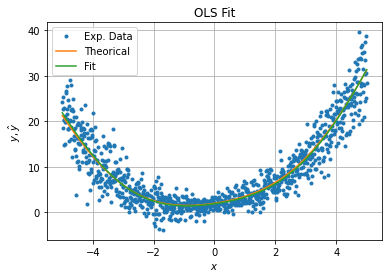

In [18]:
fig, axe = plt.subplots()
axe.plot(df['x'], df['yexp'], '.', label="Exp. Data")
axe.plot(df['x'], df['yth'], label="Theorical")
axe.plot(df['x'], df['yhat'], label="Fit")
axe.set_title("OLS Fit")
axe.set_ylabel("$y, \hat{y}$")
axe.set_xlabel("$x$")
axe.legend()
axe.grid()

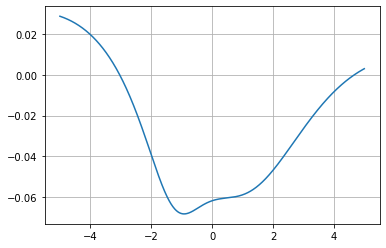

In [19]:
fig, axe = plt.subplots()
axe.plot(df['x'], (df['yhat'] - df['yth'])/df['yth'])
axe.grid()

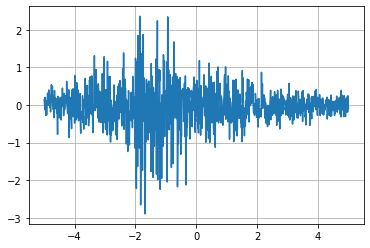

In [20]:
fig, axe = plt.subplots()
axe.plot(df['x'], (df['yexp'] - df['yth'])/df['yth'])
axe.grid()

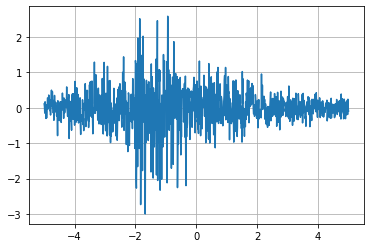

In [21]:
fig, axe = plt.subplots()
axe.plot(df['x'], (df['yexp'] - df['yhat'])/df['yhat'])
axe.grid()

In [22]:
model.regressor_[-1].coef_

array([0.        , 0.32786397, 0.91377884, 0.08855189])

In [23]:
model.regressor_[-1].intercept_

0.0

In [24]:
model.transformer_.mean_/model.transformer_.scale_

array([1.08637159])